In [ ]:
#| export
from paint_hydro.paint import *
from paint_hydro.load import *
from paint_hydro.metal import *

In [ ]:
#| export
import matplotlib.pylab as plt
import numpy as np

HACC hydro simulations provide start formation histories throughout the simulations.
One can also extract metallicity (or metallicity histories). These can be used with Fast Spectral synthesis models (FSPS) to obtain SEDs (narrow-band or photometric colors)

## Install

```sh
pip install paint_hydro
```

## How to use 

Loading the star formation histories and time steps

Text(0, 0.5, 'SFR')

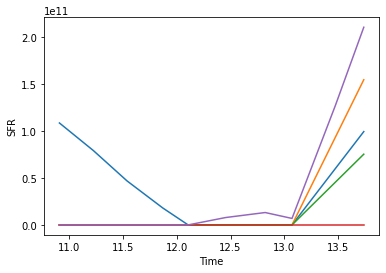

In [ ]:
# | export
dirIn = '/lcrc/project/cosmo_ai/nramachandra/Projects/Hydro_paint/Data/SFHs/'

plt.figure(32)

for galID in range(9, 14):
    fileIn = dirIn + 'gal' + str(galID) +'.txt'
    hydro_sm, hydro_tt = load_sfh(fileIn)
    plt.plot(hydro_tt, np.gradient(hydro_sm, hydro_tt))

plt.xlabel('Time')
plt.ylabel('SFR')

[3.16622381e+02 3.18295959e+02 3.10508728e+02 3.73393066e+02
 3.69182190e+02 7.85538542e+09 1.31673673e+10 6.89325627e+09
 1.26800430e+11 2.10142173e+11]


/lcrc/project/cosmo_ai/nramachandra/Projects/Hydro_paint/paint_hydro/paint_hydro/paint.py:130: RuntimeWarning: divide by zero encountered in double_scalars
  norm = formed_mass/mass0
/lcrc/project/cosmo_ai/nramachandra/Projects/Hydro_paint/paint_hydro/paint_hydro/paint.py:132: RuntimeWarning: invalid value encountered in double_scalars
  dust_mass = dust_mass0*norm
/lcrc/project/cosmo_ai/nramachandra/Projects/Hydro_paint/paint_hydro/paint_hydro/paint.py:334: RuntimeWarning: invalid value encountered in subtract
  spec_flux_nebe = spec_SED_temp1['flux'] - spec_SED_temp2['flux']
/lcrc/project/cosmo_ai/nramachandra/Projects/Hydro_paint/paint_hydro/paint_hydro/paint.py:343: RuntimeWarning: invalid value encountered in subtract
  spec_flux_duste = spec_SED_tot['flux'] - spec_SED_temp['flux']
/lcrc/project/cosmo_ai/nramachandra/Projects/Hydro_paint/paint_hydro/paint_hydro/paint.py:351: RuntimeWarning: invalid value encountered in subtract
  spec_flux_agn = spec_SED_tot['flux'] - spec_SED_tem

<matplotlib.legend.Legend>

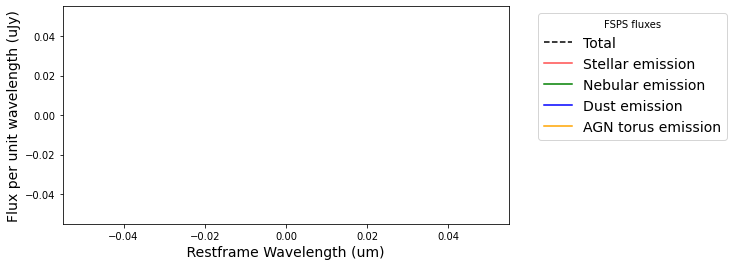

In [ ]:
#| export


f, a = plt.subplots(1, 1, figsize = (8, 4))


hydro_sfr = np.gradient(hydro_sm, hydro_tt)
print(hydro_sfr)

if True:

    obs_spec = generate_modelSED_spec_decompose(sp=None,imf=1, duste_switch=1,add_neb_emission=1,dust_law=1,add_agn=1, 
                                                add_igm_absorption=0,igm_type=0,sfh_form=3, 
                                                sfh_t=hydro_tt, sfh_sfr=hydro_sfr, 
                                                funit='Jy',cosmo='flat_LCDM',H0=70.0,Om0=0.3,
                                                gas_logu=-2.0,params_val={'log_mass':9.0,'z':0.3,'log_fagn':-3.0,'log_tauagn':1.0,
                                                                          'log_qpah':0.54,'log_umin':0.0,
                                                                          'log_gamma':-2.0,'dust1':0.1,'dust2':0.5,'dust_index':-0.7,
                                                                          'log_age':1.0,'log_alpha':0.1,'log_beta':0.1,'log_t0':0.4,
                                                                          'log_tau':0.4,'logzsol':0.0})

    a.plot(obs_spec['wave']/1e4, 1e6*obs_spec['flux_total'], color = 'k', alpha=1.0, ls = 'dashed', label='Total');
    a.plot(obs_spec['wave']/1e4, 1e6*obs_spec['flux_stellar'], color = 'r', alpha=0.7, label='Stellar emission');
    a.plot(obs_spec['wave']/1e4, 1e6*obs_spec['flux_nebe'], color = 'g', alpha=1.0, label='Nebular emission');
    a.plot(obs_spec['wave']/1e4, 1e6*obs_spec['flux_duste'], color = 'b', alpha=1.0, label='Dust emission');
    a.plot(obs_spec['wave']/1e4, 1e6*obs_spec['flux_agn'], color = 'orange', alpha=1.0, label='AGN torus emission');


a.set_ylabel('Flux per unit wavelength (uJy)', fontsize=14)
a.set_xlabel(' Restframe Wavelength (um) ', fontsize=14)

# a.set_xscale('log')
# a.set_yscale('log')


plt.legend(title='FSPS fluxes', bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=14)

# plt.xlim(8e2, 2e4)
# a.set_xlim(1000, 30000)
# a.set_xlim(0.1, 10)
# a.set_ylim(1e-6, 1e1)
# autoscale_y(a, margin=0.1)